In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

#payoff_matrix = [[1, 0.5, 4.5], # O
                 #[2, 1, 1], # Y
                 #[0.5, 2, 1]] # B

#payoff_matrix = [[1, 0.5, 3], # O
                 #[2, 1, 0.2], # Y
                 #[0.5, 2, 1]] # B

def fitness(fO, fY, payoff_matrix, estrategia):
    fB = 1 - fO - fY
    if estrategia == 'O':
        fitness_O = fO * payoff_matrix[0][0] + fY * payoff_matrix[0][1] + fB * payoff_matrix[0][2]
        return fitness_O
    elif estrategia == 'Y':
        fitness_Y = fO * payoff_matrix[1][0] + fY * payoff_matrix[1][1] + fB * payoff_matrix[1][2]
        return fitness_Y
    elif estrategia == 'B':
        fitness_B = fO * payoff_matrix[2][0] + fY * payoff_matrix[2][1] + fB * payoff_matrix[2][2]
        return fitness_B

def media_fitness(fO, fY, payoff_matrix):
    fB = 1 - fO - fY
    fitness_O = fitness(fO, fY, payoff_matrix, 'O')
    fitness_Y = fitness(fO, fY, payoff_matrix, 'Y')
    fitness_B = fitness(fO, fY, payoff_matrix, 'B')
    media_fitness = fO * fitness_O + fY * fitness_Y + fB * fitness_B
    return media_fitness

def dSdx(S, t):
    fO, fY = S
    dfOdt = fO * (fitness(fO, fY, payoff_matrix, 'O') - media_fitness(fO, fY, payoff_matrix))
    dfYdt = fY * (fitness(fO, fY, payoff_matrix, 'Y') - media_fitness(fO, fY, payoff_matrix))
    return [dfOdt, dfYdt]

fO_0 = 0.6
fY_0 = 0.2
S_0 = [fO_0, fY_0]
t = np.linspace(0, 200, 1000)


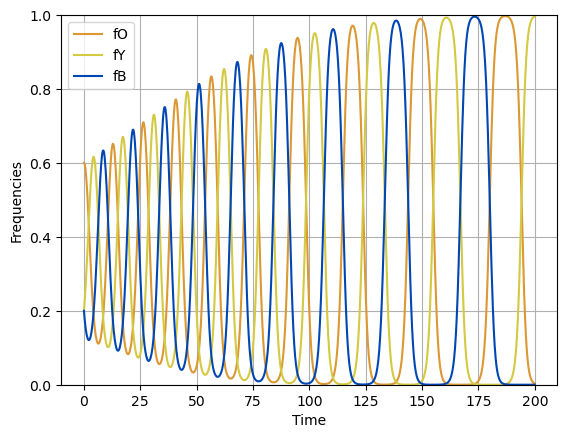

In [28]:
b = 1.9
c = 0

payoff_matrix = [[1, c, b], # O
                 [b, 1, c], # Y
                 [c, b, 1]] # B

sol = odeint(dSdx, S_0, t)
plt.plot(t, sol[:, 0], label='fO', color="#DB9833")
plt.plot(t, sol[:, 1], label='fY', color="#D3C942")
plt.plot(t, 1 - sol[:, 0] - sol[:, 1], label='fB', color="#0047B3")
plt.xlabel('Time')
plt.ylabel('Frequencies')
plt.ylim(0, 1)
plt.grid()
plt.legend()

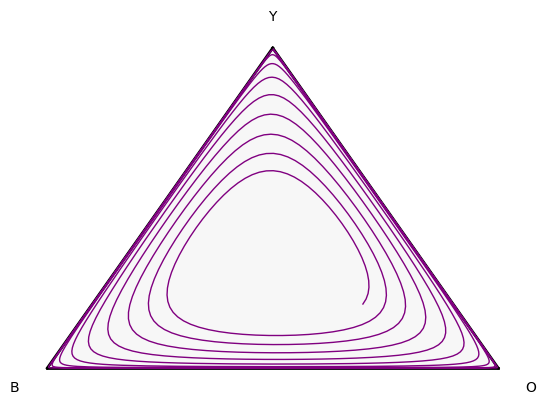

In [25]:
# ...adicione em uma nova célula...

import ternary
import matplotlib.pyplot as plt


fO = sol[:, 0]
fY = sol[:, 1]
fB = 1 - fO - fY

# Prepara os pontos para o simplex
points = list(zip(fO, fY, fB))

# Cria o diagrama ternário
figure, tax = ternary.figure(scale=1.0)
tax.boundary(linewidth=2.0)

# Nomeando os vértices do simplex
tax.right_corner_label("O")
tax.top_corner_label("Y")
tax.left_corner_label("B")

# Plota a trajetória
tax.plot(points, linewidth=1.0, color="purple")

tax.clear_matplotlib_ticks()
tax.get_axes().spines['top'].set_visible(False)
tax.get_axes().spines['right'].set_visible(False)
tax.get_axes().spines['left'].set_visible(False)
tax.get_axes().spines['bottom'].set_visible(False)
plt.show()

In [29]:
# Valores de b e c para testar
b_vals = np.linspace(0, 3, 100)
c_vals = np.linspace(0, 6, 100)

results = []

for b in b_vals:
    for c in c_vals:
        payoff_matrix = [
            [1, b-c, b],    # O
            [b, 1, b-c],    # Y
            [b-c, b, 1]     # B
        ]
        sol = odeint(dSdx, y0=S_0, t=t)
        sol = np.clip(sol, 0, 1)
        fO_final = sol[-1, 0]
        fY_final = sol[-1, 1]
        fB_final = 1 - fO_final - fY_final
        results.append([b, c, fO_final, fY_final, fB_final])

results = np.array(results)
print(results)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.06060606e-02 1.00000000e+00 0.00000000e+00
  2.58648658e-12]
 [0.00000000e+00 1.21212121e-01 1.00000000e+00 0.00000000e+00
  6.79667433e-12]
 ...
 [3.00000000e+00 5.87878788e+00 8.72817044e-30 1.00000000e+00
  0.00000000e+00]
 [3.00000000e+00 5.93939394e+00 2.75315221e-20 0.00000000e+00
  1.00000000e+00]
 [3.00000000e+00 6.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]]


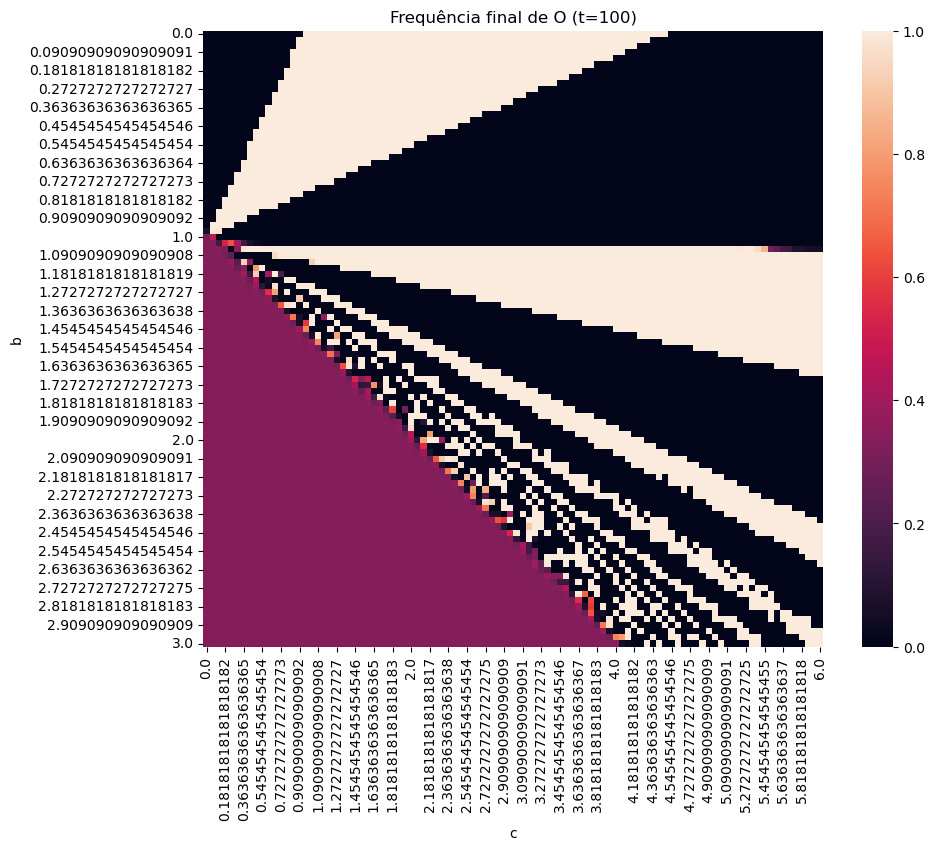

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

df = pd.DataFrame(results, columns=['b', 'c', 'fO', 'fY', 'fB'])
pivot = df.pivot(index='b', columns='c', values='fO')

plt.figure(figsize=(10,8))
ax = sns.heatmap(pivot, annot=False, cmap='rocket')

plt.title('Frequência final de O (t=100)')
plt.xlabel('c')
plt.ylabel('b')

plt.savefig('C:\\Unicamp\\mestrado\\simulacoes\\RPS-python\\RPS-POO\\testes\\heatmap_bec_fO.png')
plt.show()

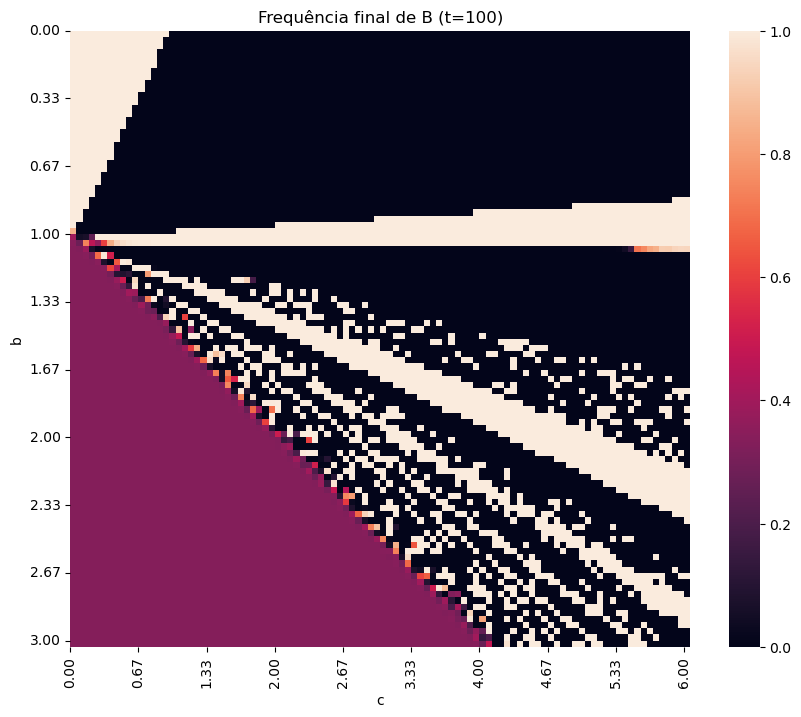

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

df = pd.DataFrame(results, columns=['b', 'c', 'fO', 'fY', 'fB'])
pivot = df.pivot(index='b', columns='c', values='fB')

plt.figure(figsize=(10,8))
ax = sns.heatmap(pivot, annot=False, cmap='rocket')

plt.title('Frequência final de B (t=100)')
plt.xlabel('c')
plt.ylabel('b')

# Pegue os valores reais de b e c
b_vals = pivot.index.values
c_vals = pivot.columns.values

# Escolha alguns índices para mostrar nos ticks (exemplo: 6)
num_ticks = 10
b_tick_idx = np.linspace(0, len(b_vals)-1, num_ticks, dtype=int)
c_tick_idx = np.linspace(0, len(c_vals)-1, num_ticks, dtype=int)

ax.set_yticks(b_tick_idx)
ax.set_yticklabels([f"{b_vals[i]:.2f}" for i in b_tick_idx])
ax.set_xticks(c_tick_idx)
ax.set_xticklabels([f"{c_vals[i]:.2f}" for i in c_tick_idx])

plt.savefig('C:\\Unicamp\\mestrado\\simulacoes\\RPS-python\\RPS-POO\\testes\\heatmap_bec_fB.png')
plt.show()

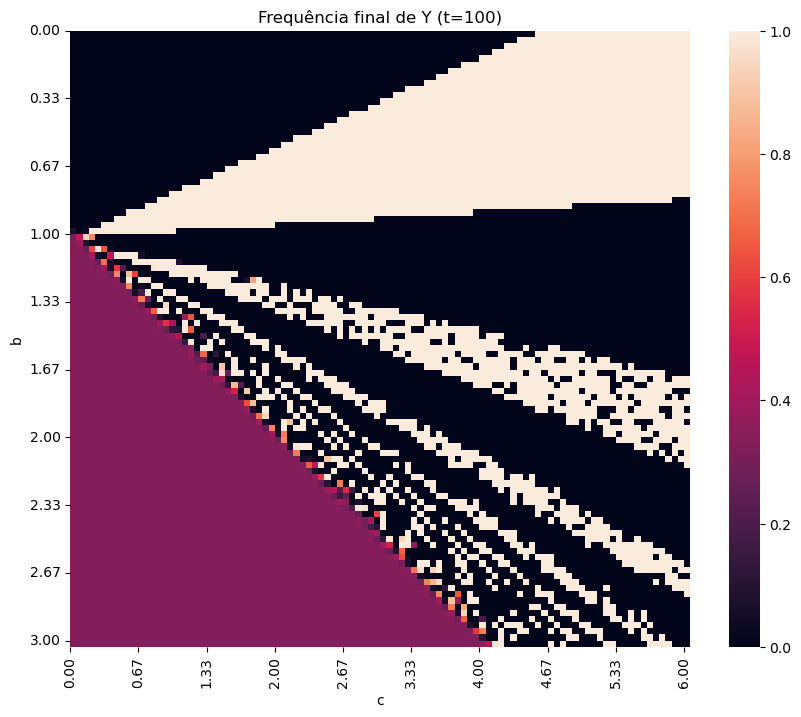

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

df = pd.DataFrame(results, columns=['b', 'c', 'fO', 'fY', 'fB'])
pivot = df.pivot(index='b', columns='c', values='fY')

plt.figure(figsize=(10,8))
ax = sns.heatmap(pivot, annot=False, cmap='rocket')

plt.title('Frequência final de Y (t=100)')
plt.xlabel('c')
plt.ylabel('b')

# Pegue os valores reais de b e c
b_vals = pivot.index.values
c_vals = pivot.columns.values

# Escolha alguns índices para mostrar nos ticks (exemplo: 6)
num_ticks = 10
b_tick_idx = np.linspace(0, len(b_vals)-1, num_ticks, dtype=int)
c_tick_idx = np.linspace(0, len(c_vals)-1, num_ticks, dtype=int)

ax.set_yticks(b_tick_idx)
ax.set_yticklabels([f"{b_vals[i]:.2f}" for i in b_tick_idx])
ax.set_xticks(c_tick_idx)
ax.set_xticklabels([f"{c_vals[i]:.2f}" for i in c_tick_idx])

plt.savefig('C:\\Unicamp\\mestrado\\simulacoes\\RPS-python\\RPS-POO\\testes\\heatmap_bec_fY.png')
plt.show()

In [22]:
# Valores de cO e cB para testar
cO_vals = np.linspace(0, 1.5, 100)
cB_vals = np.linspace(1.5, 2, 100)

b = 2
c = 1.5

results = []

for cO in cO_vals:
    for cB in cB_vals:
        payoff_matrix = [
            [1, b-c, b],    # O
            [b-cO, 1, b-cB],    # Y
            [b-c, b, 1]     # B
        ]
        sol = odeint(dSdx, y0=S_0, t=t)
        sol = np.clip(sol, 0, 1)
        fO_final = sol[-1, 0]
        fY_final = sol[-1, 1]
        fB_final = 1 - fO_final - fY_final
        results.append([cO, cB, fO_final, fY_final, fB_final])

results = np.array(results)
print(results)

C:\Users\nicko\AppData\Local\Temp\ipykernel_22364\2088664770.py:17: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(dSdx, y0=S_0, t=t)


[[0.         1.5        0.33333333 0.33333334 0.33333333]
 [0.         1.50505051 0.33413346 0.33317331 0.33269323]
 [0.         1.51010101 0.33493052 0.3330139  0.33205558]
 ...
 [1.5        1.98989899 1.         0.         0.        ]
 [1.5        1.99494949 1.         0.         0.        ]
 [1.5        2.         1.         0.         0.        ]]


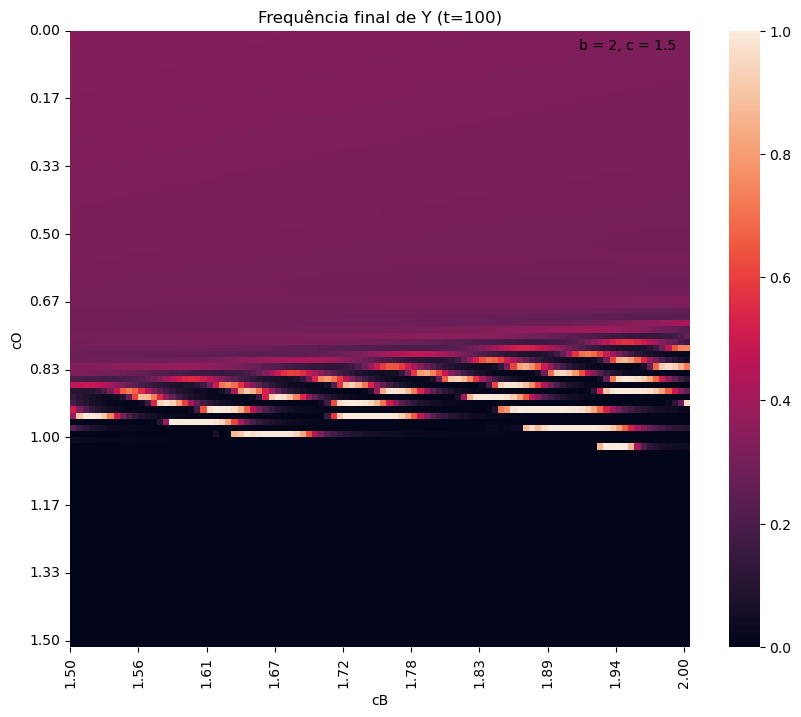

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

df = pd.DataFrame(results, columns=['cO', 'cB', 'fO', 'fY', 'fB'])
pivot = df.pivot(index='cO', columns='cB', values='fY')

#print("Linhas (index):", pivot.index)
#print("Colunas (columns):", pivot.columns)

plt.figure(figsize=(10,8))
ax = sns.heatmap(pivot, annot=False, cmap='rocket')

plt.title('Frequência final de Y (t=100)')
plt.xlabel('cB')
plt.ylabel('cO')
plt.text(0.82, 0.97, 'b = 2, c = 1.5', transform=ax.transAxes)

# Pegue os valores reais de b e c
b_vals = pivot.index.values
c_vals = pivot.columns.values

# Escolha alguns índices para mostrar nos ticks (exemplo: 6)
num_ticks = 10
cB_tick_idx = np.linspace(0, len(cB_vals)-1, num_ticks, dtype=int)
cO_tick_idx = np.linspace(0, len(cO_vals)-1, num_ticks, dtype=int)

ax.set_yticks(cO_tick_idx)
ax.set_yticklabels([f"{cO_vals[i]:.2f}" for i in cO_tick_idx])
ax.set_xticks(cB_tick_idx)
ax.set_xticklabels([f"{cB_vals[i]:.2f}" for i in cB_tick_idx])

plt.savefig('C:\\Unicamp\\mestrado\\simulacoes\\RPS-python\\RPS-POO\\testes\\heatmap_cOcB_fY.png')
plt.show()